## Загрузка и чтение данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Монтирование Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Чтение данных

In [ ]:
prices_data = pd.read_csv("/content/drive/MyDrive/indexProcessed.csv")
exchanges_data = pd.read_csv('/content/drive/MyDrive/indexInfo.csv')

Данные являются уже предобработанными и не содержат пропусков и ошибок

Будем исследовать цены индекса гонгконгской биржи, поэтому  отфильтруем данные по ней

In [ ]:
hsi_data = prices_data[prices_data['Index'] == 'HSI']


In [ ]:
print(prices_data.head())
print(exchanges_data.head())

  Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013  
2  2552.399902     0.0  331.811987  
3  2583.899902     0.0  335.906987  
4  2607.100098     0.0  338.923013  
          Region                  Exchange      Index Currency
0  United States   New York Stock Exchange        NYA      USD
1  United States                    NASDAQ       IXIC      USD
2      Hong Kong  Hong Kong Stock Exchange        HSI      HKD
3          China   Shanghai Stock Exchange  000001.SS      CNY
4          J

##Визуализация данных

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

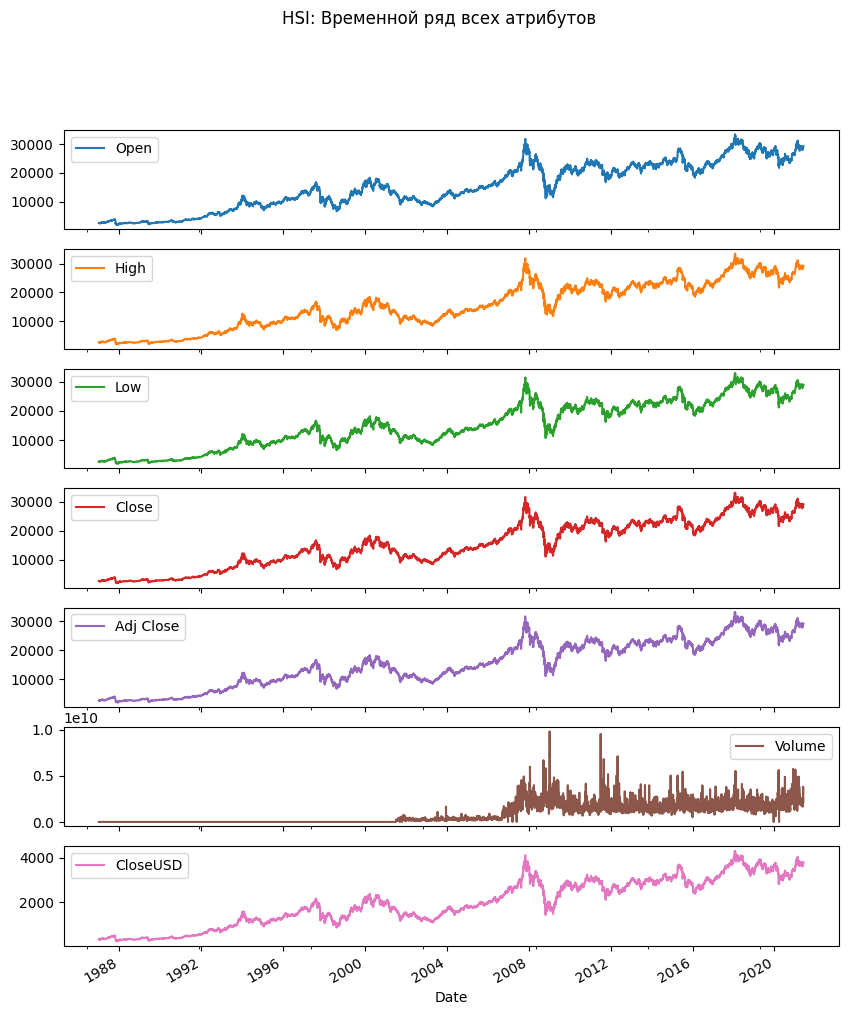

In [ ]:
hsi_data.set_index('Date', inplace=True)
hsi_data.index = pd.to_datetime(hsi_data.index)

hsi_data.plot(subplots=True, figsize=(10, 12), title='HSI: Временной ряд всех атрибутов')


Из-за небольшого масштаба Open, High, Low и Close имеют малое различие друг перед другом. Отличие имеет Volume - объем продаж. Из графиков можно заметить что пик Volume похоже был в момент мирового кризиса  2008 года, во время резкого падения стоимости акций. Отобразим график во временном диапазоне 2007 - 2008 годов

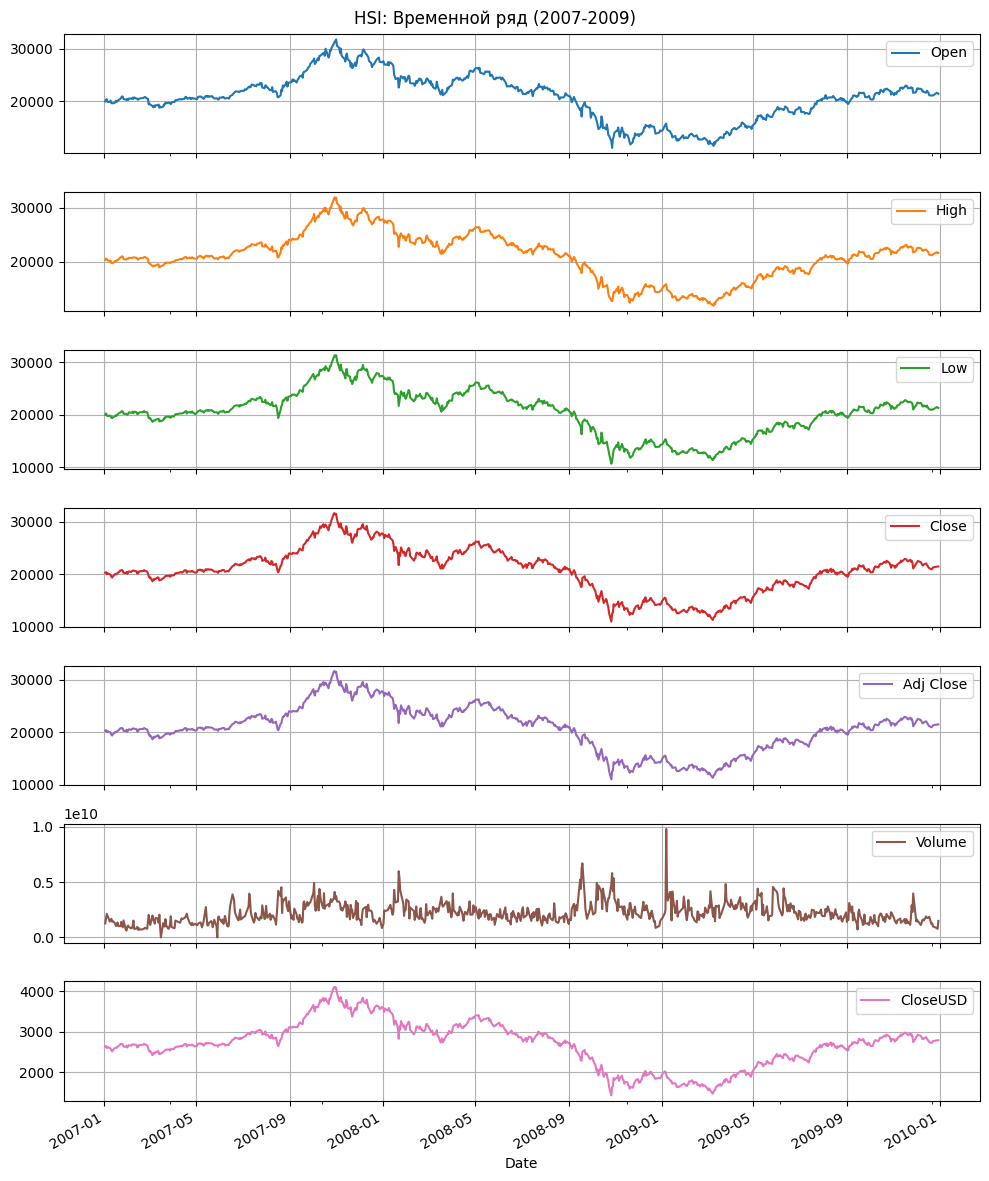

In [ ]:
crisis_data = hsi_data['2007-01-01':'2009-12-31']

crisis_data.plot(subplots=True, figsize=(10, 12),  grid=True, title='HSI: Временной ряд (2007-2009)')

plt.tight_layout()
plt.show()

В целом, можно заметить корреляцию между резкими падениями цены и резкими повышениямм объема продаж. Имеют место резкие всплески объема торгов, что возможно связано с паническими продажами в кризисное время

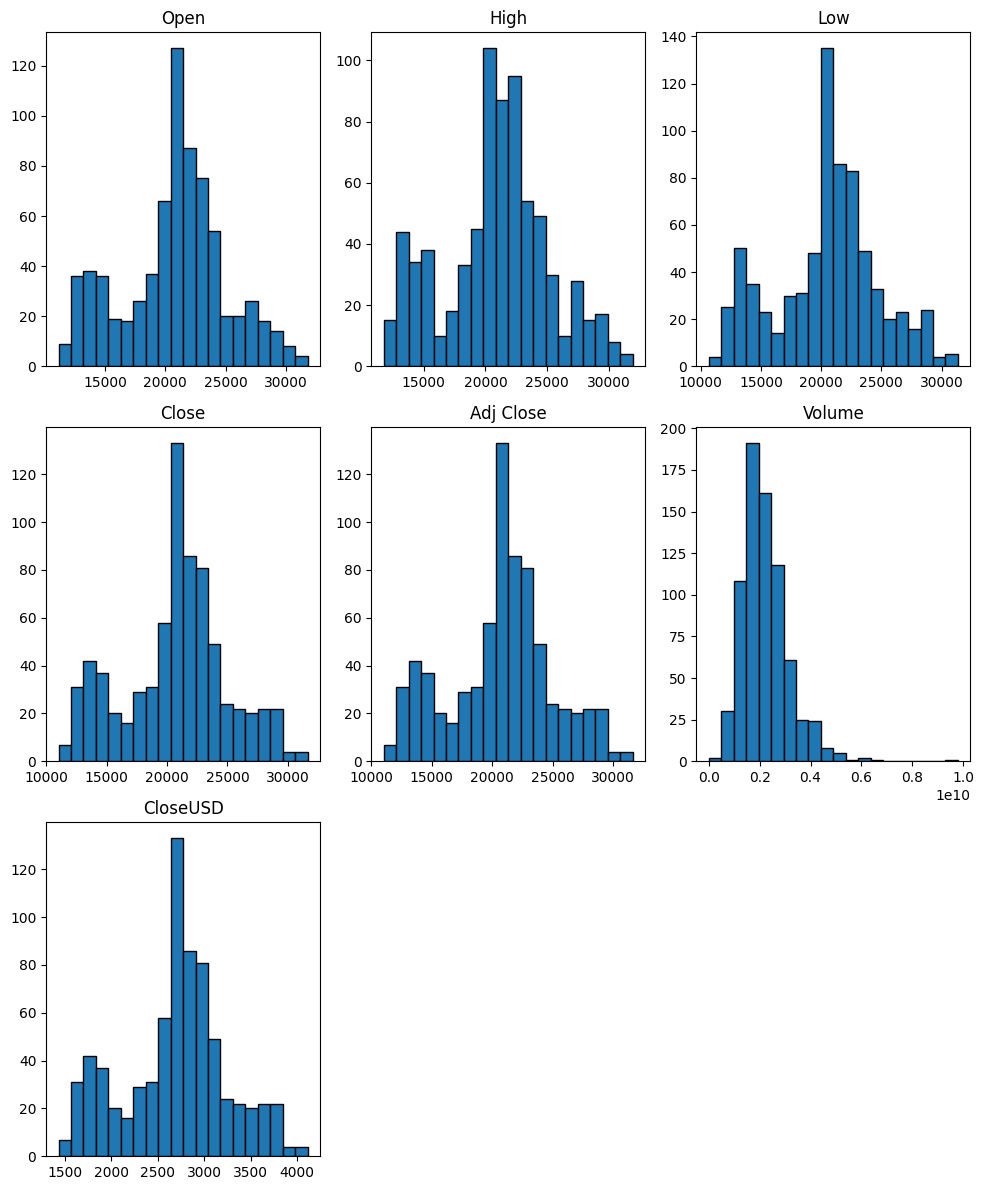

In [ ]:
crisis_data.hist(figsize=(10, 12), grid=False, bins=20, edgecolor='black')

plt.tight_layout()
plt.show()

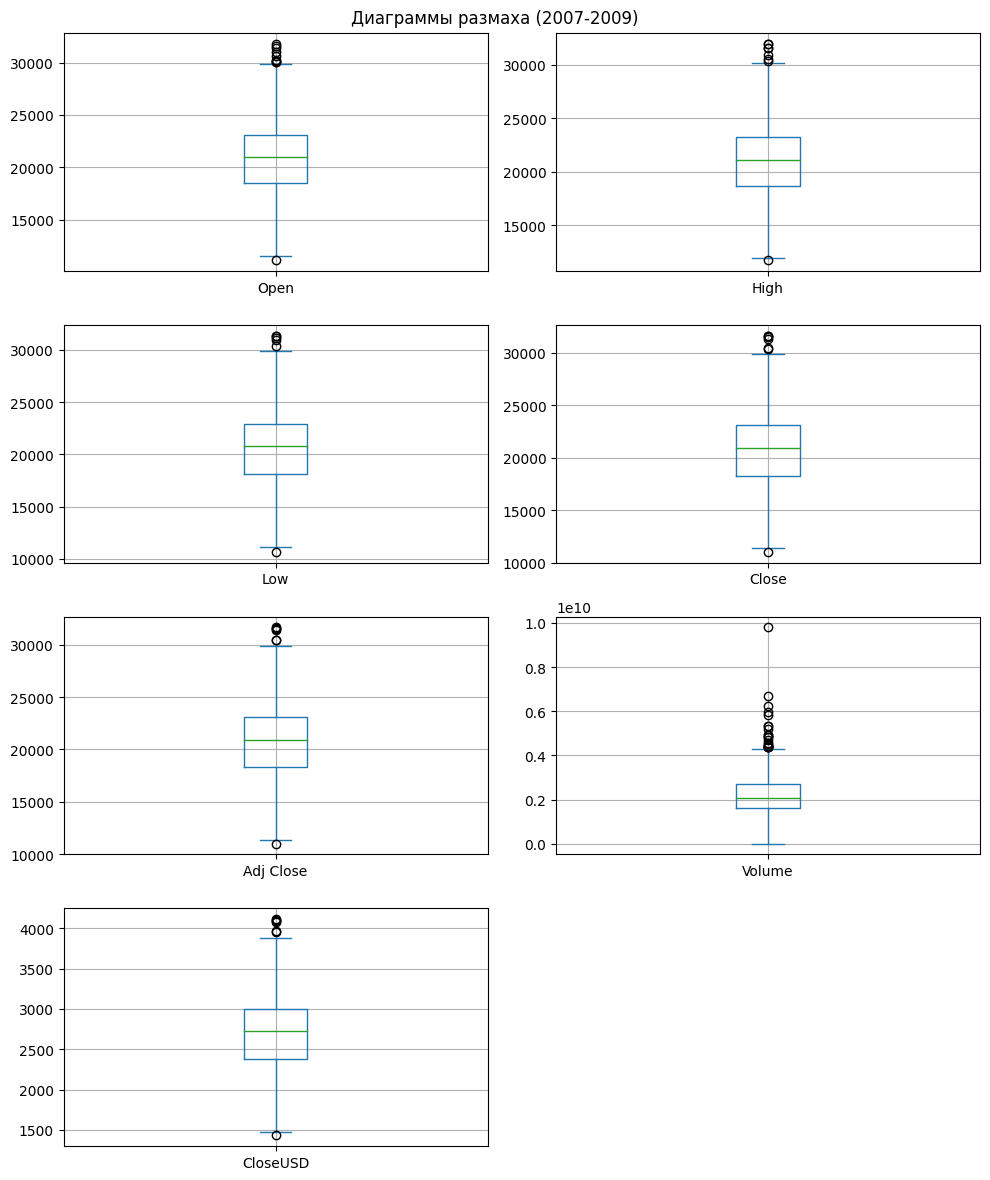

In [ ]:
crisis_data.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 12), grid=True, title='Диаграммы размаха (2007-2009)')

plt.tight_layout()
plt.show()

#Скользящие средние с окнами




##Скользящие средние для всего временного ряда

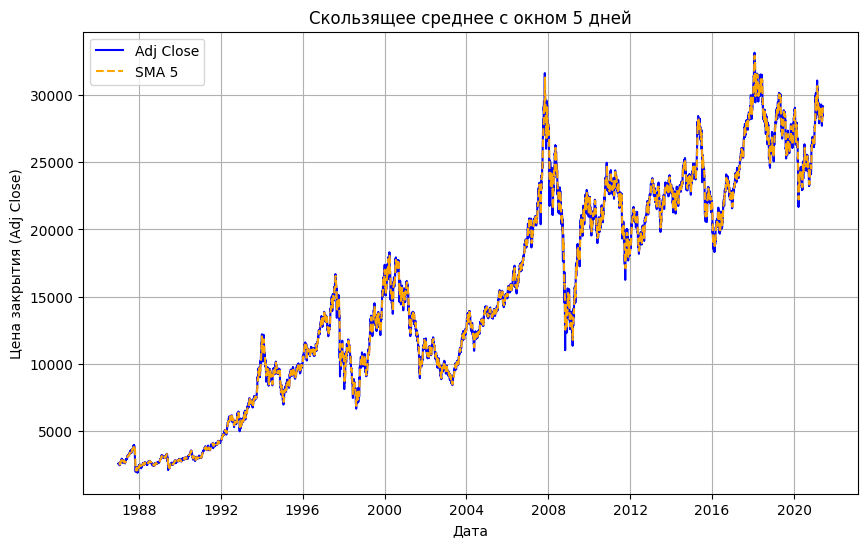

In [ ]:
adj_close = hsi_data['Adj Close']

rolling_5 = adj_close.rolling(window=5).mean()
rolling_10 = adj_close.rolling(window=10).mean()
rolling_30 = adj_close.rolling(window=30).mean()
rolling_50 = adj_close.rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_5, label='SMA 5', color='orange', linestyle='--')
plt.title('Скользящее среднее с окном 5 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()


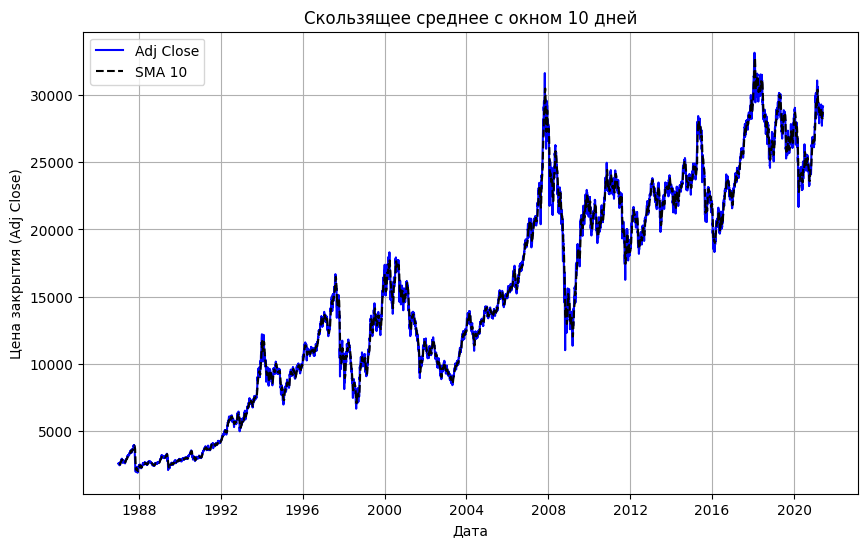

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_10, label='SMA 10', color='black', linestyle='--')
plt.title('Скользящее среднее с окном 10 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

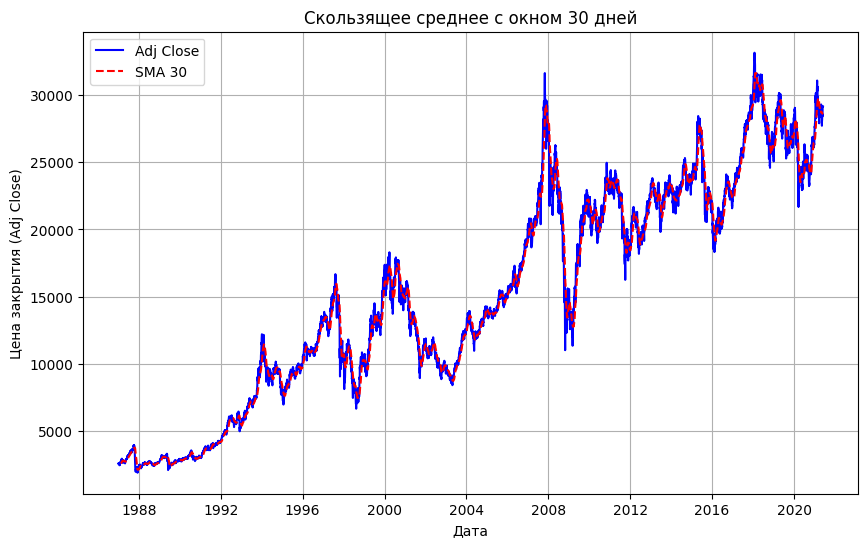

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_30, label='SMA 30', color='red', linestyle='--')
plt.title('Скользящее среднее с окном 30 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

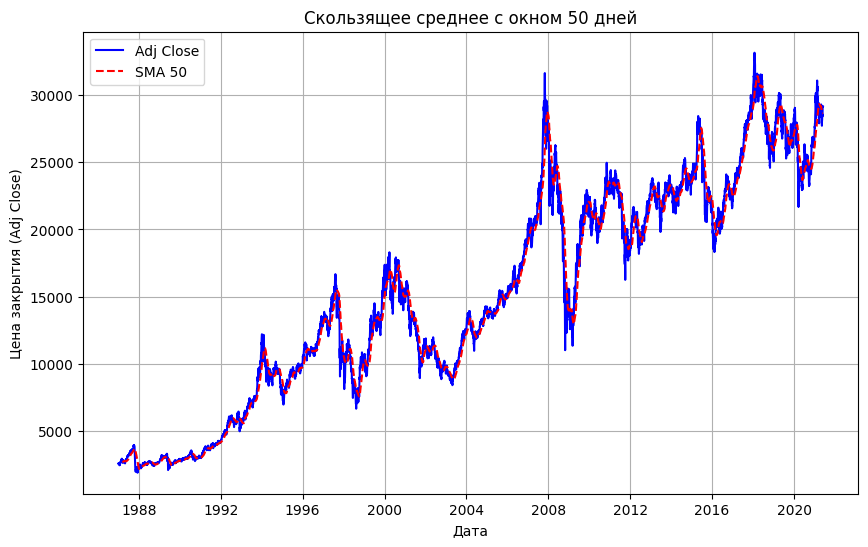

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_50, label='SMA 50', color='red', linestyle='--')
plt.title('Скользящее среднее с окном 50 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

Исходя из того, что длина временного ряда слишком огромна, то построим SMA на более коротком кризисном отрезке 2007-2009 годах.

## Скользящие средние для кризисного времени


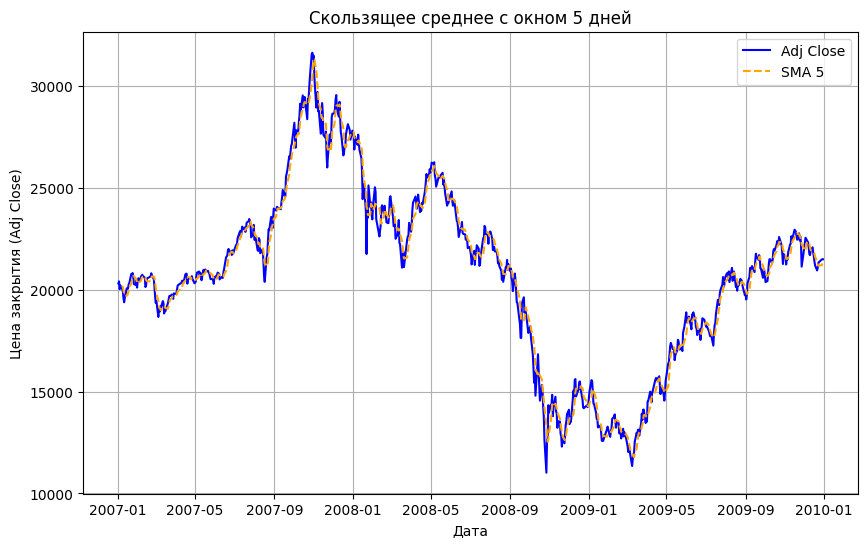

In [ ]:
adj_close = crisis_data['Adj Close']

rolling_5 = adj_close.rolling(window=5).mean()
rolling_10 = adj_close.rolling(window=10).mean()
rolling_30 = adj_close.rolling(window=30).mean()
rolling_50 = adj_close.rolling(window=50).mean()

plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_5, label='SMA 5', color='orange', linestyle='--')
plt.title('Скользящее среднее с окном 5 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()


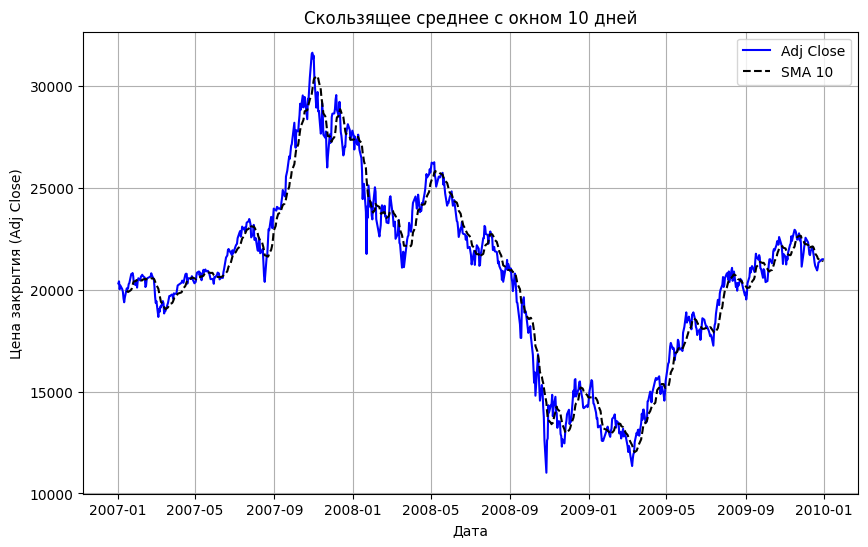

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_10, label='SMA 10', color='black', linestyle='--')
plt.title('Скользящее среднее с окном 10 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

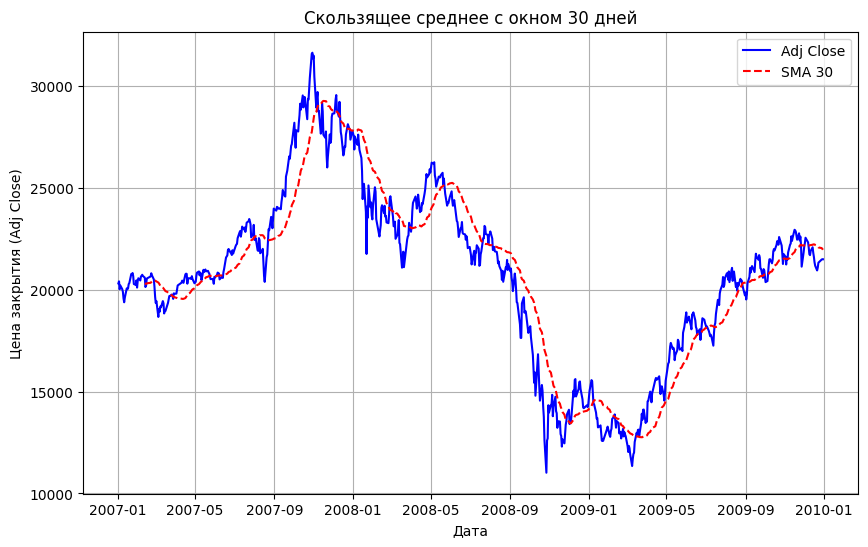

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_30, label='SMA 30', color='red', linestyle='--')
plt.title('Скользящее среднее с окном 30 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

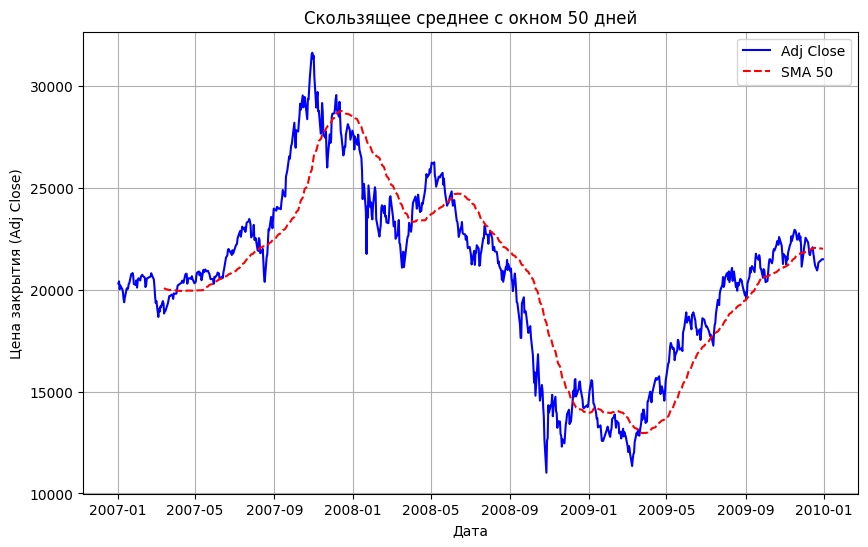

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(rolling_50, label='SMA 50', color='red', linestyle='--')
plt.title('Скользящее среднее с окном 50 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

Чем больше окно, тем больше сглаживаются данные, можно сказать, что с меньшим окном можно оценивать локальные тренды, с большим глобальные

##Экспоненциальное скользящее средние

In [ ]:
ema_5 = adj_close.ewm(span=5, adjust=False).mean()

ema_10 = adj_close.ewm(span=10, adjust=False).mean()
ema_30 = adj_close.ewm(span=30, adjust=False).mean()
ema_50 = adj_close.ewm(span=50, adjust=False).mean()

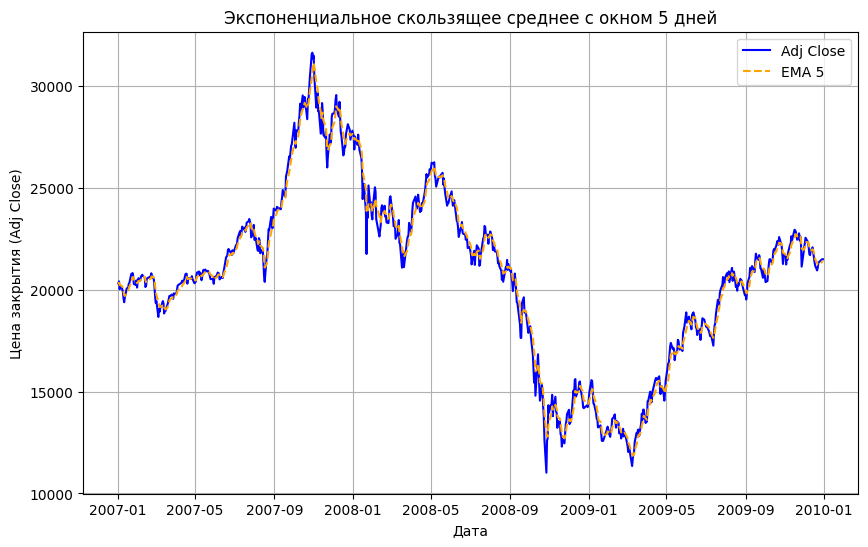

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(ema_5, label='EMA 5', color='orange', linestyle='--')
plt.title('Экспоненциальное скользящее среднее с окном 5 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

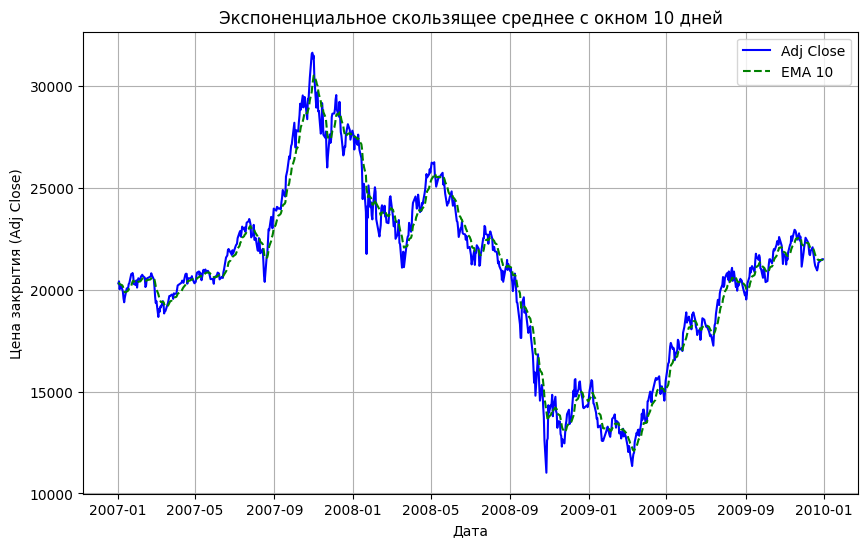

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(ema_10, label='EMA 10', color='green', linestyle='--')
plt.title('Экспоненциальное скользящее среднее с окном 10 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

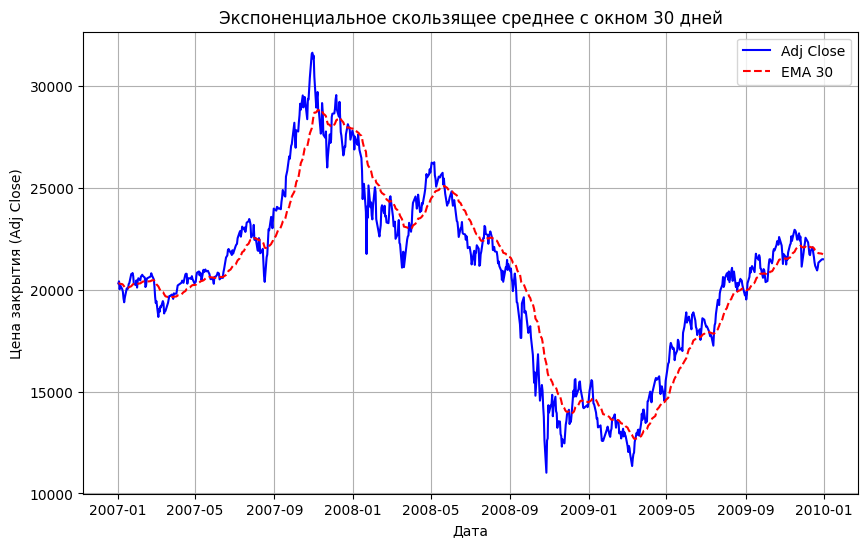

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(ema_30, label='EMA 30', color='red', linestyle='--')
plt.title('Экспоненциальное скользящее среднее с окном 30 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

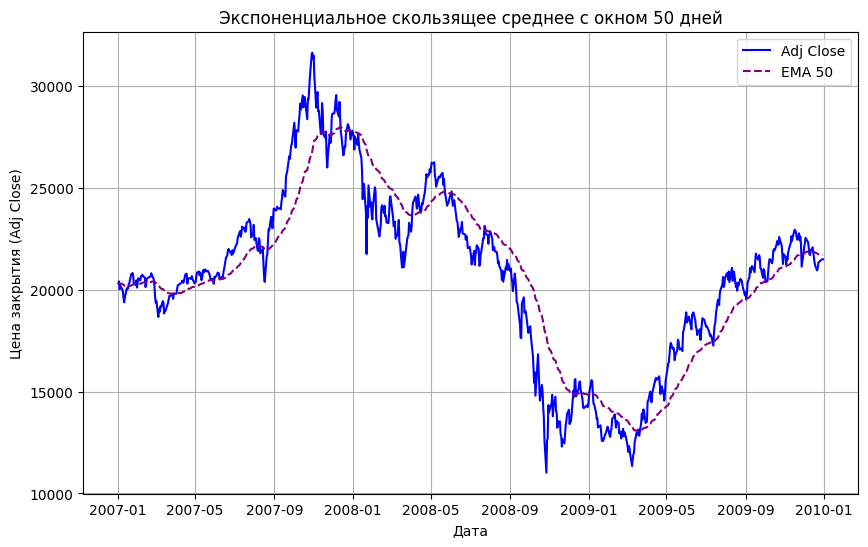

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adj_close, label='Adj Close', color='blue')
plt.plot(ema_50, label='EMA 50', color='purple', linestyle='--')
plt.title('Экспоненциальное скользящее среднее с окном 50 дней')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

## Экспоненциальное скользящее среднее с прогнозом

<ipython-input-36-2a198d557969>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ema_5_crisis = ema_5[-1]


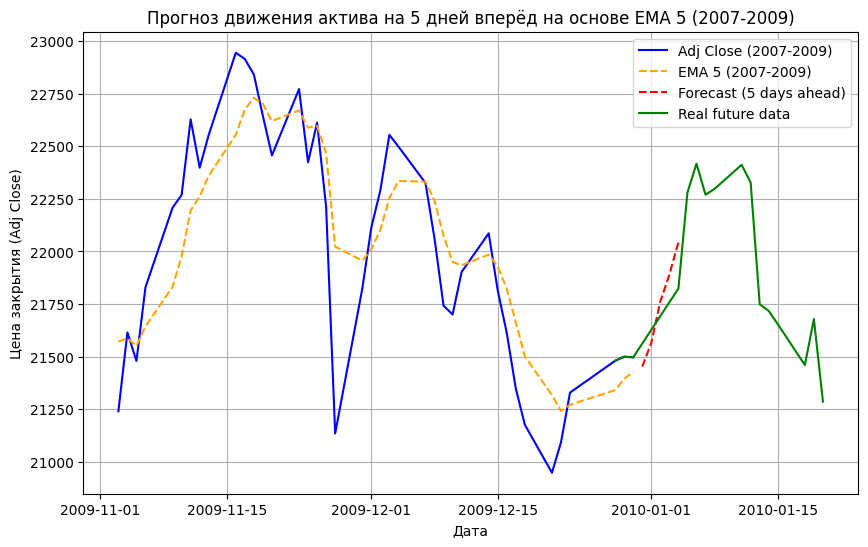

In [ ]:
forecast_period_days = 5

real_data = hsi_data['2009-12-25':'2010-01-20']
real_close = real_data['Adj Close']

recent_changes_crisis = crisis_data['Adj Close'].pct_change().tail(5).mean()

forecast_ema_5_crisis = ema_5[-1]

volatility_crisis = crisis_data['Adj Close'].pct_change().tail(10).std()

forecast_crisis_days = []

for i in range(forecast_period_days):
    random_noise_crisis = np.random.normal(0, volatility_crisis / 2)
    forecast_value_crisis = forecast_ema_5_crisis * (1 + recent_changes_crisis + random_noise_crisis)
    forecast_crisis_days.append(forecast_value_crisis)
    forecast_ema_5_crisis = forecast_value_crisis

future_dates_crisis_days = pd.date_range(start=crisis_data.index[-1], periods=forecast_period_days+1, freq='D')[1:]

plt.figure(figsize=(10, 6))
plt.plot(crisis_data.index[-40:], crisis_data['Adj Close'][-40:], label='Adj Close (2007-2009)', color='blue')
plt.plot(crisis_data.index[-40:], ema_5[-40:], label='EMA 5 (2007-2009)', color='orange', linestyle='--')
plt.plot(future_dates_crisis_days, forecast_crisis_days, label='Forecast (5 days ahead)', color='red', linestyle='--')
plt.plot(real_data.index, real_close, label = 'Real future data', color = 'green')
plt.title('Прогноз движения актива на 5 дней вперёд на основе EMA 5 (2007-2009)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

Для прогноза в 5 дней взят промежуток поменьше, длиной в 40 последних дней. На графике можно увидеть прогноз на 5 дней

<ipython-input-49-9215b14fce94>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_ema_5_crisis = ema_100_crisis[-1]


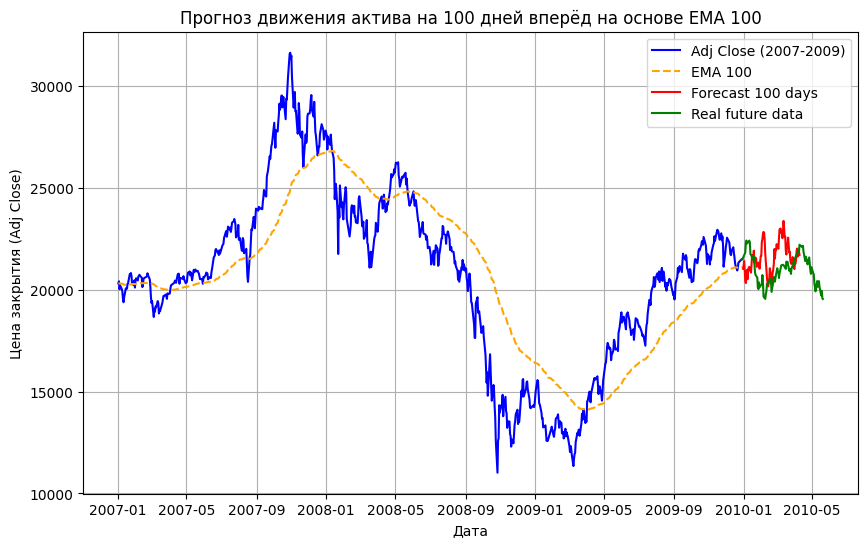

In [ ]:
ema_100_crisis = crisis_data['Adj Close'].ewm(span=100, adjust=False).mean()

real_data = hsi_data['2009-12-25':'2010-05-20']
real_close = real_data['Adj Close']

forecast_period_days = 100

recent_changes_crisis = crisis_data['Adj Close'].pct_change().tail(100).mean()

forecast_ema_5_crisis = ema_100_crisis[-1]

volatility_crisis = crisis_data['Adj Close'].pct_change().tail(100).std()

forecast_crisis_days = []

for i in range(forecast_period_days):
    random_noise_crisis = np.random.normal(0, volatility_crisis)
    forecast_value_crisis = forecast_ema_5_crisis * (1 + recent_changes_crisis + random_noise_crisis)
    forecast_crisis_days.append(forecast_value_crisis)
    forecast_ema_5_crisis = forecast_value_crisis

future_dates_crisis_days = pd.date_range(start=crisis_data.index[-1], periods=forecast_period_days+1, freq='D')[1:]

plt.figure(figsize=(10, 6))
plt.plot(crisis_data.index, crisis_data['Adj Close'], label='Adj Close (2007-2009)', color='blue')
plt.plot(crisis_data.index, ema_100_crisis, label='EMA 100', color='orange', linestyle='--')
plt.plot(future_dates_crisis_days, forecast_crisis_days, label='Forecast 100 days', color='red')
plt.plot(real_data.index, real_close, label = 'Real future data', color = 'green')
plt.title('Прогноз движения актива на 100 дней вперёд на основе EMA 100')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (Adj Close)')
plt.legend()
plt.grid(True)
plt.show()

Разработан прогноз на 5 дней и 100 дней вперед на основе 5-периодной экспоненциальной скользящей средней (EMA). Для моделирования будущих значений использовались недавние изменения цены и стандартное отклонение последних периодов.
Прогноз показал плавное продолжение тренда, что говорит о том, что EMA 5 захватывает краткосрочные изменения и может быть полезна для краткосрочного прогнозирования цен.

